# Support vector machine

## 1. First things first: generate a data set in scikit learn

Support Vector Machines can be used on problem cases where we have an $n$-dimensional feature space. For teaching purposes, however, it is very intuitive to use a 2-dimensional feature space so you can see what exactly is going on when using support vector machines.

scikit learn has excellent data sets generator. one of them is `make_blobs`, another one is `make_moons`. Let's generate four data sets which we'll all analyze using support vector machines.

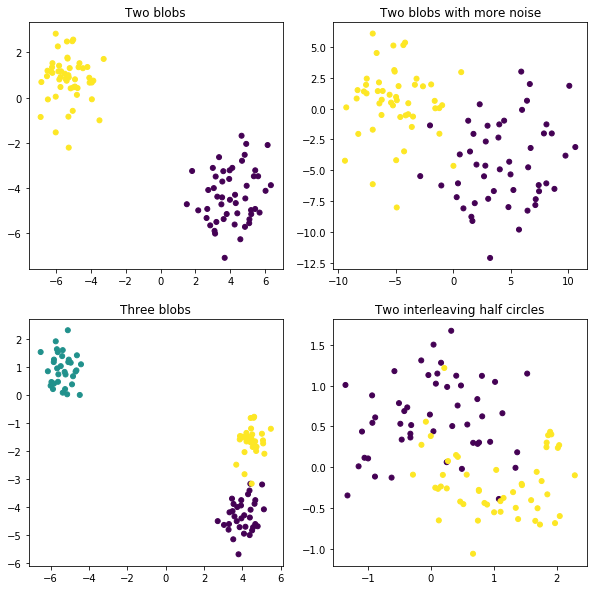

In [164]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title("Two blobs")
X, y = make_blobs(n_features = 2, centers = 2, random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.subplot(222)
plt.title("Two blobs with more noise")
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.8,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.subplot(223)
plt.title("Three blobs")
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.subplot(224)
plt.title("Two interleaving half circles")
X, y = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

plt.show()

## 2. Two groups 

### 2.1 Max margin

Let's have a look at our first plot again. We'll start with this data set and fit a simple linear support vector machine on these data. You can use the scikit-learn function `svm.SVC` to do that!

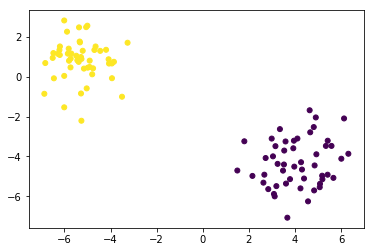

In [120]:
X, y = make_blobs(n_features = 2, centers = 2, random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)

In [121]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's save the first feature (on the horizontal axis) as X1 and the second feature (on the vertical axis) as X2.

In [122]:
X1= X[:,0]
X2= X[:,1]

In [123]:
#clf.coef_

Next, let'x store the min and maximum values X1 and X2 operate in. We'll add some slack (1) to the min and max boundaries.

In [124]:
# plot the decision function
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

Let's see if what we just did makes sense. Have a look at your plot and verify the result!

In [125]:
print(X1_max)

7.321748977894958


Next, we'll create a grid. You can do this by using the numpy function `linspace`, which creates a numpy array with evenly spaced numbers over a specified interval. The default of numbers is 50 and we don't need that many, so let's specify `num = 10` for now. You'll see that you need to up this number one we get to the classification of more than 2 groups.

In [126]:
x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)

In [127]:
X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

In [128]:
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Let's now get the coordinates of the decision function

In [129]:
df = clf.decision_function(x1x2).reshape(X1_C.shape)

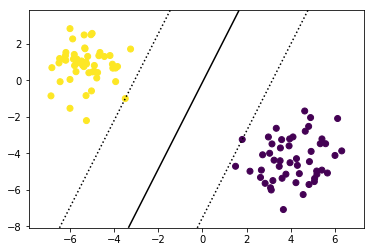

In [130]:
plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

The coordinates of the support vectors can be found in the `support_vectors_`-attribute:

In [131]:
clf.support_vectors_

array([[ 1.80628336, -3.23748621],
       [-3.50355959, -0.99875038]])

Now create your plot again but highlight your support vectors. 

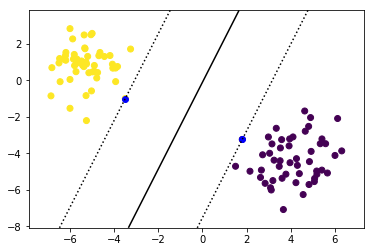

In [132]:
plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue') 
plt.show()

### 2.2 Soft margin tuning

The previous example was pretty easy. The 2 "clusters" were easily separable by one straight line classifying every single instance correctly. But what if this isn't the case? Let's have a look at the second dataset we had generated:

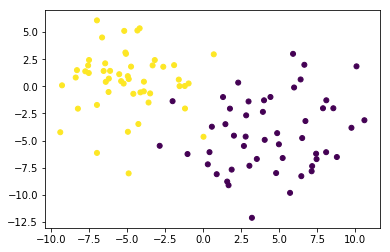

In [133]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.8,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)


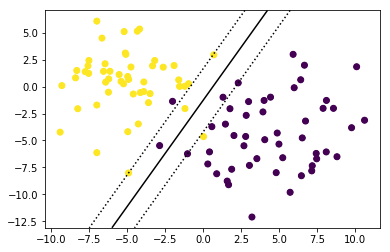

In [134]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

from sklearn import svm

clf = svm.SVC(kernel='linear')  #, C=1000000,
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

df = clf.decision_function(x1x2).reshape(X1_C.shape)

plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

As you can see, 3 instances are misclassified (1 yellow, 2 purple). The reason for this is that in scikit learn, the svm module automatically allows for slack variables. If we want to make sure we have as few misclassifications as possible, we should set a bigger value for C, the regularization parameter.

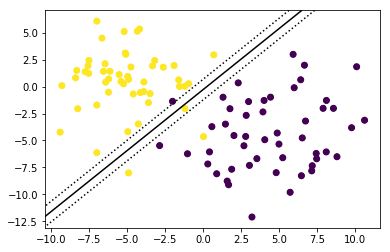

In [135]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.8,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

from sklearn import svm

clf = svm.SVC(kernel='linear', C=1000000) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

df = clf.decision_function(x1x2).reshape(X1_C.shape)

plt.scatter(X1, X2, c = y)
axes = plt.gca()
axes.contour(X1_C, X2_C, df, colors= "black", levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

## 3. More than 2 groups

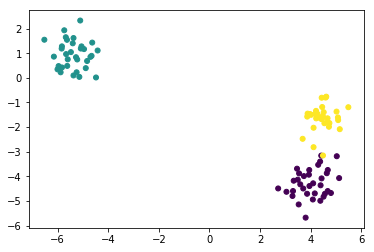

In [136]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

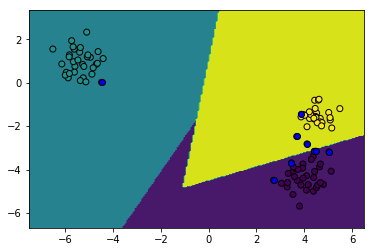

In [195]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5,  random_state = 123)

clf = svm.SVC(kernel = "linear",C=20) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 
plt.show()

In [192]:
clf.coef_

array([[-0.38979847, -2.30708975],
       [-0.21739447,  0.08280377],
       [ 0.05817422, -0.01012228],
       [ 0.14088221,  0.44024716]])

## 4. The kernel trick

It would probably be nicer to have non-linear decision boundaries here, let's have a look at that! You can also see how your support vectors are changing. 

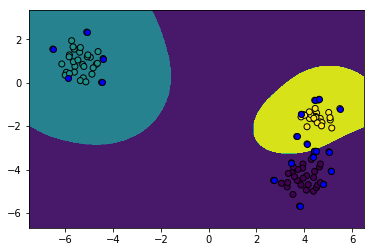

In [152]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5,  random_state = 123)

clf = svm.SVC(kernel='rbf', C=20) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 
plt.show()

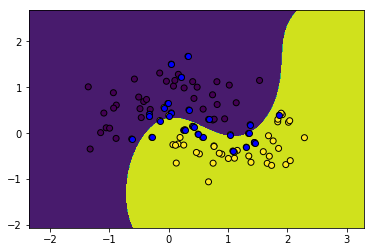

In [170]:
X, y = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)

clf = svm.SVC(kernel='rbf', C=20) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 
plt.show()

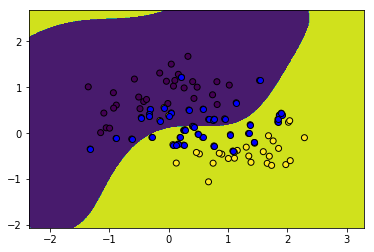

In [182]:
X, y = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)

clf = svm.SVC(kernel='rbf', C=1, probability = True) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 
plt.show()

# Sources

https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html